In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [130]:
# Load data (deserialize)
path = r'C:\Users\marcu\Documents\Quant\Programming\Macro Strategy\Backtests\macro_backtest_rebal_freq_1_reg_lookback_10.pickle'
with open(path, 'rb') as handle:
    current_backtest = pickle.load(handle)

In [195]:
vol_scalar = .25 / current_backtest['Vol']

<AxesSubplot:>

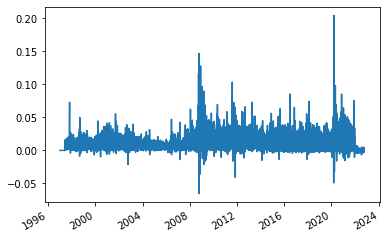

In [196]:
(current_backtest['Strategy Returns']*vol_scalar).plot()

<AxesSubplot:>

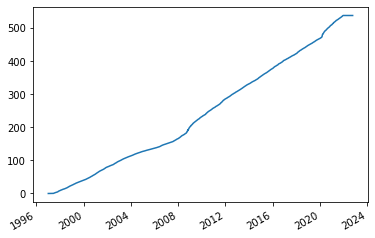

In [197]:
current_backtest['Cumulative Returns'].plot()

C:\Users\marcu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


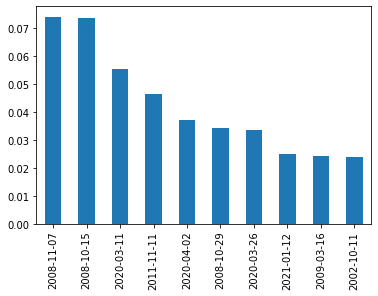

In [198]:
# Compute Drawdowns
def max_drawdown(cum_returns, N = 10):
    
    # Initialize a dict to store drawdown data
    drawdowns = pd.Series()

    for i, args in enumerate(cum_returns.items()):

        # Exctract args
        date, ret = args
        
        # Initialize max & min value which will be dynamically updated as we traverse through dates
        if i == 0:
            peak = ret
            trough = ret

        # Break out of drawdown
        if ret > peak and trough is not peak:
            
            # Update drawdowns dict
            index = date
            drawdowns[index] = np.round(peak - trough, 4)

            # Reset variables
            trough = ret
            peak = ret  
                 

        # Out of drawdown, new peak
        elif ret > peak:
            peak = ret
            trough = ret
                    
        # In drawdown, new trough
        elif (ret < peak) and (ret < trough): 
            trough = ret

    # Change idices from datetimeindex to date
    drawdowns.index = drawdowns.index.date

    # Plot N largest drawdowns
    drawdowns.nlargest(N).plot.bar()
    
    return drawdowns

drawdowns = max_drawdown((current_backtest['Strategy Returns']*.2).cumsum())